In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/Users/luisfelipemh/Desktop/Personal/python_study_ML/CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#see the numbers of rows and columns
data.shape

(205, 26)

In [5]:
#We see that many cars had an extension on their names, so we want to keep only the first part of the name
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
def first_part(x):
    return x.split(' ',1)[0] #Split: Seperar, split(), splits a string into a list

In [7]:
#applying first_part function
data['CarCompany']=data['CarName'].apply(lambda x: first_part(x))

In [8]:
#dropping car name column
data.drop(['CarName'],axis=1,inplace=True)

In [9]:
data.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
#We saw that many names are wrong, so, we are going to correct the names
for i in data['CarCompany']:
    if i=='maxda':
        i='mazda'
    elif i=='porcshce':
        i='porsche'
    elif i=='toyouta':
        i='toyota'
    elif i=='vokswagen':
        i='volkswagen'
    elif i=='vw':
        i='volkswagen'
    else:
        i=i

In [11]:
for i in data['CarCompany']:
    print(i)

alfa-romero
alfa-romero
alfa-romero
audi
audi
audi
audi
audi
audi
audi
bmw
bmw
bmw
bmw
bmw
bmw
bmw
bmw
chevrolet
chevrolet
chevrolet
dodge
dodge
dodge
dodge
dodge
dodge
dodge
dodge
dodge
honda
honda
honda
honda
honda
honda
honda
honda
honda
honda
honda
honda
honda
isuzu
isuzu
isuzu
isuzu
jaguar
jaguar
jaguar
maxda
maxda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
mazda
buick
buick
buick
buick
buick
buick
buick
buick
mercury
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
mitsubishi
Nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
nissan
peugeot
peugeot
peugeot
peugeot
peugeot
peugeot
peugeot
peugeot
peugeot
peugeot
peugeot
plymouth
plymouth
plymouth
plymouth
plymouth
plymouth
plymouth
porsche
porcshce
porsche
porsche
porsche
renault
renault
saab
saab
saab
saab
saab
saab
subaru
subaru
subaru
suba

In [12]:
#through this way we can verify if we have duplicated values
sum(data.duplicated().tolist())

0

In [13]:
dictionary={}
for element in data.duplicated().tolist():
    if element in dictionary:
        dictionary[element]+=1
    else:
        dictionary[element]=1

In [14]:
print(dictionary[False])

205


In [15]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
dictionary={}
for i in data['CarCompany'].tolist():
    if i in dictionary:
        dictionary[i]+=1
    else:
        dictionary[i]=1

In [17]:
print(dictionary)

{'alfa-romero': 3, 'audi': 7, 'bmw': 8, 'chevrolet': 3, 'dodge': 9, 'honda': 13, 'isuzu': 4, 'jaguar': 3, 'maxda': 2, 'mazda': 15, 'buick': 8, 'mercury': 1, 'mitsubishi': 13, 'Nissan': 1, 'nissan': 17, 'peugeot': 11, 'plymouth': 7, 'porsche': 4, 'porcshce': 1, 'renault': 2, 'saab': 6, 'subaru': 12, 'toyota': 31, 'toyouta': 1, 'vokswagen': 1, 'volkswagen': 9, 'vw': 2, 'volvo': 11}


In [18]:
cars_count=pd.DataFrame(dictionary.items()) #convert dictionary in dict items, () ()

In [19]:
cars_count.columns=['Car','Count']

In [20]:
cars_count.sort_values(by=['Count'],ascending=False).iloc[0:3]['Car'].tolist()

['toyota', 'nissan', 'mazda']

<AxesSubplot:xlabel='price', ylabel='Count'>

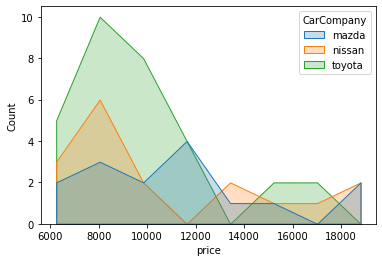

In [21]:
#Price of 3 principal carts
sns.histplot(data=data,x='price',element='poly',
             hue=data[data['CarCompany'].isin(cars_count.sort_values(by=['Count'],ascending=False).iloc[0:3]['Car'].tolist())]['CarCompany'])

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Prueba'}, xlabel='symboling', ylabel='price'>

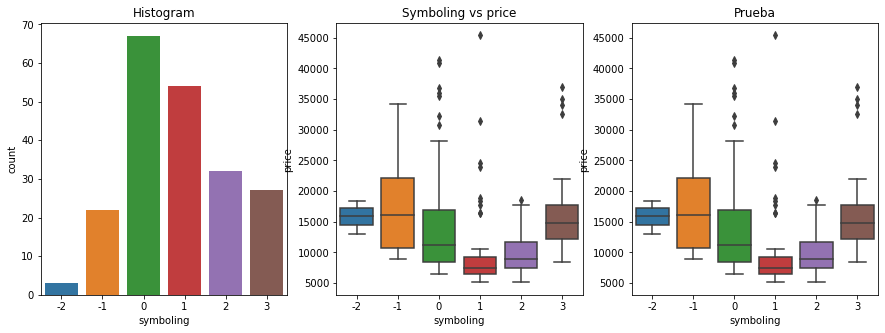

In [22]:
#Visualizing categorical data
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) #its a way to plot multiple plots
plt.title('Histogram')
sns.countplot(data['symboling'])

plt.subplot(1,3,2)
plt.title('Symboling vs price')
sns.boxplot(x=data.symboling, y=data.price)

plt.subplot(1,3,3)
plt.title('Prueba')
sns.boxplot(x=data.symboling, y=data.price)

In [23]:
for i in data.columns.unique().tolist():
    a=data[i].unique().tolist()
    if len(a)<=7:
        print(f'{i} / {a}')
    else:
        print(f'{i} has many unique values')

car_ID has many unique values
symboling / [3, 1, 2, 0, -1, -2]
fueltype / ['gas', 'diesel']
aspiration / ['std', 'turbo']
doornumber / ['two', 'four']
carbody / ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
drivewheel / ['rwd', 'fwd', '4wd']
enginelocation / ['front', 'rear']
wheelbase has many unique values
carlength has many unique values
carwidth has many unique values
carheight has many unique values
curbweight has many unique values
enginetype / ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
cylindernumber / ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
enginesize has many unique values
fuelsystem has many unique values
boreratio has many unique values
stroke has many unique values
compressionratio has many unique values
horsepower has many unique values
peakrpm has many unique values
citympg has many unique values
highwaympg has many unique values
price has many unique values
CarCompany has many unique values


In [24]:
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [25]:
def barplot(data,numerical):
    lista=[]
    j=0
    for i in data.columns.unique().tolist():
        a=data[i].unique().tolist()
        if len(a)<=7:
            j+=1
            lista.append(i)
            plt.figure(figsize=(40,5))
            plt.subplot(1,9,j)
            plt.title(f'{i} vs price')
            sns.boxplot(x=data[i], y=data[numerical])

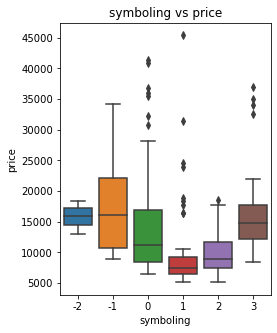

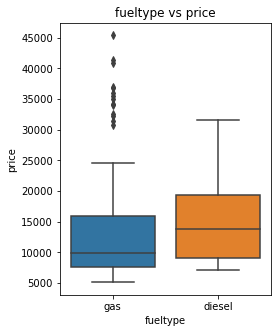

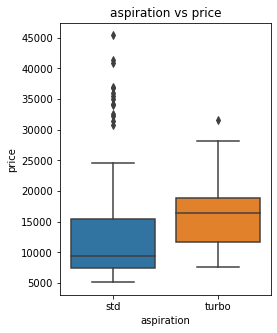

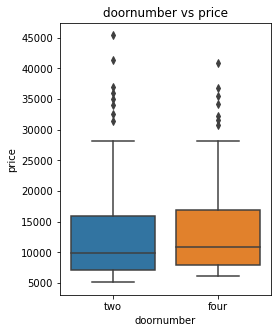

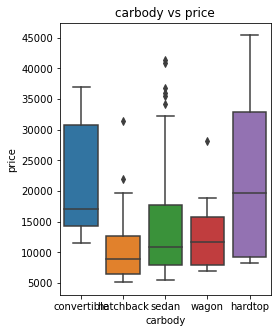

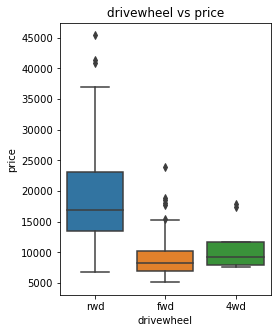

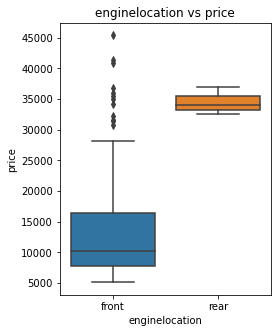

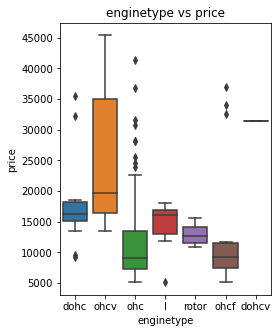

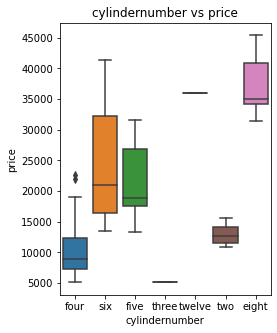

In [26]:
barplot(data,'price')

In [27]:
data_bins=pd.DataFrame(data.groupby(['CarCompany'])['price'].mean()).sort_values(by=['price']).reset_index()

In [28]:
def bin(x):
    if x>0 and x<=10000:
        return 'Budget'
    elif x>10000 and x<=20000:
        return 'Medium'
    elif x>20000 and x<=40000:
        return 'Medium'

In [29]:
data_bins['segmentation']=data_bins['price'].apply(lambda x: bin(x))

In [30]:
data=data.merge(data_bins[['CarCompany','segmentation']], how='left',on='CarCompany')

In [31]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,segmentation
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Medium


In [32]:
data=data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth', 'segmentation']]

In [33]:
data.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,segmentation
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


In [34]:
data['fueltype'].dtypes=='O'

True

In [35]:
for i in data.columns:
    print(data[i].dtypes)

float64
object
object
object
object
float64
int64
object
object
int64
float64
int64
float64
float64
object


In [40]:
#returns the unique values of columns which has n<=5 of unique values
dictionary={}
for i in data.columns:
    if len(list(data[i].unique()))<=5:
        dictionary[i]=list(data[i].unique())

In [41]:
dictionary

{'fueltype': ['gas', 'diesel'],
 'aspiration': ['std', 'turbo'],
 'carbody': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'drivewheel': ['rwd', 'fwd', '4wd'],
 'segmentation': ['Medium', 'Budget']}

In [745]:
#get dummie variables
def dummies(data):
    for i in data.columns:
        if data[i].dtypes=='O':
            dummies = pd.get_dummies(data[i],drop_first=False)
            data=pd.concat([data,dummies], axis=1)
            data.drop([i],axis=1,inplace=True)
    return data

In [746]:
data=dummies(data)

In [747]:
data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,...,rotor,eight,five,four,six,three,twelve,two,Budget,Medium
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,0,1,...,0,0,0,0,1,0,0,0,0,1
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,0,1,...,0,0,0,1,0,0,0,0,0,1
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,0,1,...,0,0,1,0,0,0,0,0,0,1


In [748]:
#Train-Test splir and feature scalin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #transform features by scaling each feature to a given range
from sklearn.feature_selection import RFE #RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVR

In [749]:
data_train, data_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [750]:
data_train[[i for i in data.columns if len(data[i].unique())>2 ]]=MinMaxScaler().fit_transform(data_train[[i for i in data.columns if len(data[i].unique())>2 ]])

<ipython-input-750-5e91feec4b99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[[i for i in data.columns if len(data[i].unique())>2 ]]=MinMaxScaler().fit_transform(data_train[[i for i in data.columns if len(data[i].unique())>2 ]])
/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [751]:
data_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,...,rotor,eight,five,four,six,three,twelve,two,Budget,Medium
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,0,1,...,0,0,0,1,0,0,0,0,1,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,0,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,0,1,...,0,0,0,1,0,0,0,0,0,1
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,0,1,...,0,0,0,1,0,0,0,0,0,1


In [752]:
data_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,...,rotor,eight,five,four,six,three,twelve,two,Budget,Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.090909,0.909091,...,0.027972,0.020979,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.482517,0.517483
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.288490,...,0.165472,0.143818,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.501451,0.501451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

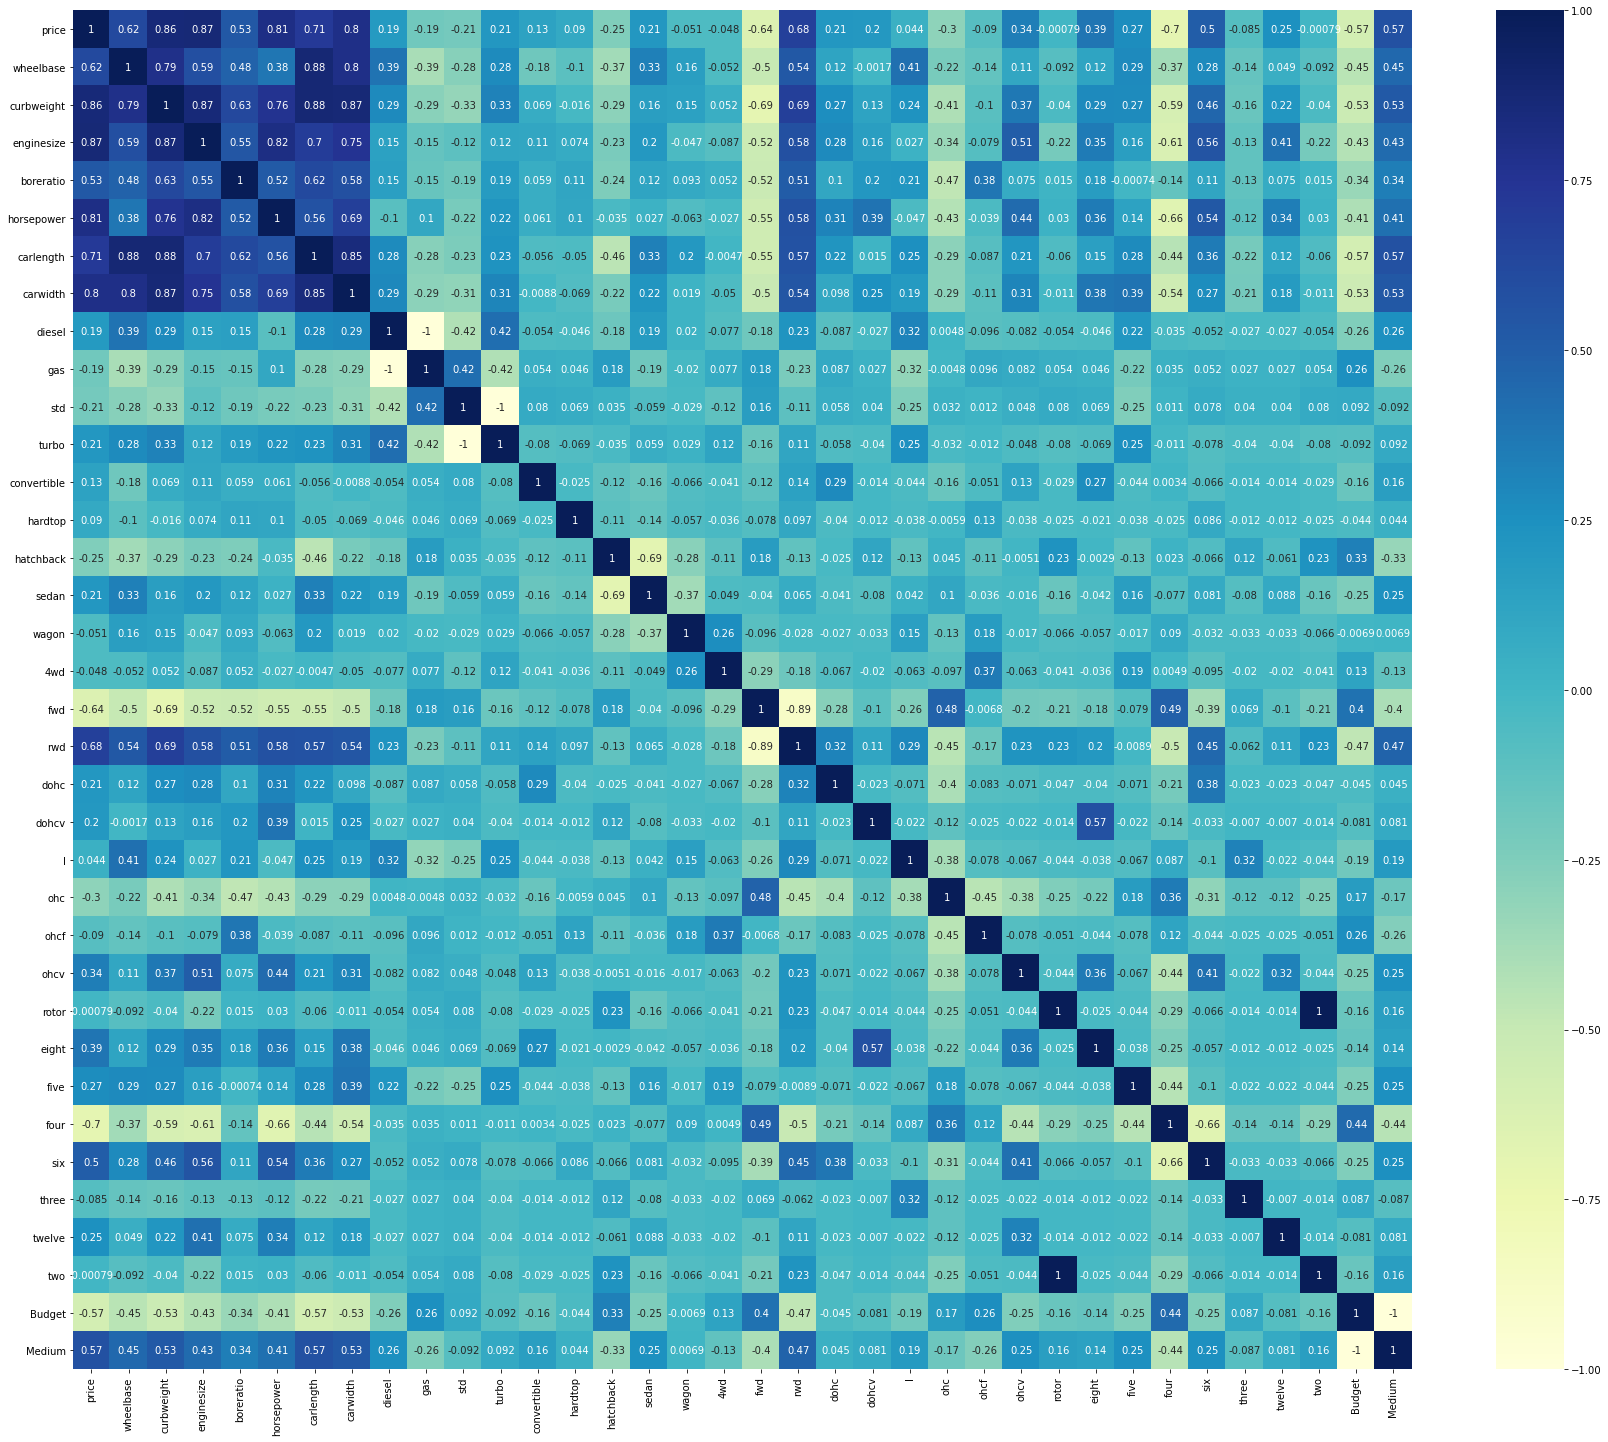

In [753]:
#Correlation with the heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(data_train.corr(), annot=True, cmap="YlGnBu")

In [754]:
#The variables which has a high correlation with the price
data_train.corr()['price'].abs().sort_values(ascending=False)

price          1.000000
enginesize     0.867915
curbweight     0.861860
horsepower     0.806183
carwidth       0.799380
carlength      0.713749
four           0.695256
rwd            0.677169
fwd            0.635202
wheelbase      0.622591
Budget         0.570997
Medium         0.570997
boreratio      0.533591
six            0.500613
eight          0.385555
ohcv           0.339468
ohc            0.297108
five           0.271430
hatchback      0.252484
twelve         0.247489
dohc           0.209311
std            0.206540
turbo          0.206540
sedan          0.205018
dohcv          0.197875
gas            0.191150
diesel         0.191150
convertible    0.133124
ohcf           0.089985
hardtop        0.089735
three          0.085274
wagon          0.051173
4wd            0.047979
l              0.044246
rotor          0.000793
two            0.000793
Name: price, dtype: float64

In [755]:
#dividing data into X and Y variables
y_train=data_train['price']
x_train=data_train.drop(['price'],axis=1)

In [756]:
y_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64

In [757]:
lm = LinearRegression()

In [758]:
lm.fit(x_train,y_train)

LinearRegression()

In [759]:
rfe = RFE(lm,10)

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [760]:
rfe = rfe.fit(x_train,y_train)

In [761]:
x_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'carlength', 'carwidth', 'diesel', 'gas', 'std', 'turbo', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'dohc',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four',
       'six', 'three', 'twelve', 'two', 'Budget', 'Medium'],
      dtype='object')

In [762]:
rfe.support_

array([False,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False])

In [763]:
rfe.ranking_

array([ 2,  1,  1, 10,  1,  1,  1, 19, 16, 22, 24,  1, 25, 15, 26, 23, 18,
       17, 11, 20,  1, 21,  5,  6,  1, 14,  1,  3,  1,  8,  4,  9, 12,  7,
       13])

In [764]:
#with zip, we can cocateante each column of a list

In [765]:
result = zip(x_train.columns, rfe.support_, rfe.ranking_)
print(list(result))

[('wheelbase', False, 2), ('curbweight', True, 1), ('enginesize', True, 1), ('boreratio', False, 10), ('horsepower', True, 1), ('carlength', True, 1), ('carwidth', True, 1), ('diesel', False, 19), ('gas', False, 16), ('std', False, 22), ('turbo', False, 24), ('convertible', True, 1), ('hardtop', False, 25), ('hatchback', False, 15), ('sedan', False, 26), ('wagon', False, 23), ('4wd', False, 18), ('fwd', False, 17), ('rwd', False, 11), ('dohc', False, 20), ('dohcv', True, 1), ('l', False, 21), ('ohc', False, 5), ('ohcf', False, 6), ('ohcv', True, 1), ('rotor', False, 14), ('eight', True, 1), ('five', False, 3), ('four', True, 1), ('six', False, 8), ('three', False, 4), ('twelve', False, 9), ('two', False, 12), ('Budget', False, 7), ('Medium', False, 13)]


In [766]:
[rfe.support_]

[array([False,  True,  True, False,  True,  True,  True, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False, False,  True, False,  True,
        False,  True, False, False, False, False, False, False])]

In [767]:
x_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carlength', 'carwidth',
       'convertible', 'dohcv', 'ohcv', 'eight', 'four'],
      dtype='object')

In [768]:
x_train_rfe=x_train[x_train.columns[rfe.support_]]

In [769]:
x_train_rfe

,curbweight,enginesize,horsepower,carlength,carwidth,convertible,dohcv,ohcv,eight,four
122,0.272692,0.139623,0.083333,0.426016,0.291667,0,0,0,0,1
125,0.500388,0.339623,0.395833,0.452033,0.666667,0,0,0,0,1
166,0.314973,0.139623,0.266667,0.448780,0.308333,0,0,0,0,1
1,0.411171,0.260377,0.262500,0.450407,0.316667,1,0,0,0,1
199,0.647401,0.260377,0.475000,0.775610,0.575000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
87,0.354926,0.184906,0.283333,0.508943,0.425000,0,0,0,0,1
103,0.609775,0.452830,0.433333,0.707317,0.516667,0,0,1,0,0
67,0.786268,0.460377,0.312500,0.809756,0.833333,0,0,0,0,0
24,0.185803,0.109434,0.083333,0.263415,0.291667,0,0,0,0,1


In [770]:
def linear_regression(y,x):
    x = sm.add_constant(x)
    lm = sm.OLS(y,x).fit()
    print(lm.summary())
    return x

In [771]:
linear_regression(y_train,x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     95.37
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.20e-55
Time:                        20:12:08   Log-Likelihood:                 167.61
No. Observations:                 143   AIC:                            -313.2
Df Residuals:                     132   BIC:                            -280.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0259      0.032     -0.799      

,const,curbweight,enginesize,horsepower,carlength,carwidth,convertible,dohcv,ohcv,eight,four
122,1.0,0.272692,0.139623,0.083333,0.426016,0.291667,0,0,0,0,1
125,1.0,0.500388,0.339623,0.395833,0.452033,0.666667,0,0,0,0,1
166,1.0,0.314973,0.139623,0.266667,0.448780,0.308333,0,0,0,0,1
1,1.0,0.411171,0.260377,0.262500,0.450407,0.316667,1,0,0,0,1
199,1.0,0.647401,0.260377,0.475000,0.775610,0.575000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.354926,0.184906,0.283333,0.508943,0.425000,0,0,0,0,1
103,1.0,0.609775,0.452830,0.433333,0.707317,0.516667,0,0,1,0,0
67,1.0,0.786268,0.460377,0.312500,0.809756,0.833333,0,0,0,0,0
24,1.0,0.185803,0.109434,0.083333,0.263415,0.291667,0,0,0,0,1


In [772]:
x_train_rfe=x_train_rfe.drop(['carlength','carwidth'],axis=1)

In [773]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [774]:
#VIF measures how much the behavior (variance) of an independent variable is influences, or inflated,by its
# interaction/correlation with other independe variables. VIF allow quick mesure of how much a variable is
#contributing to the standard error in the regression
vif = pd.DataFrame()
vif['Features']=x_train_rfe.columns #transpose the list of columns into rows

In [775]:
for i in x_train_rfe.values:
    print(i[0]) #i'm printing each list of the array only the first element

0.2726920093095423
0.5003878975950349
0.3149728471683475
0.41117145073700545
0.6474010861132662
0.2843289371605896
0.1873545384018619
0.3762606671838634
0.6450737005430567
0.212955779674166
0.18580294802172226
0.6369278510473235
0.3479441427463149
0.14972847168347558
0.30721489526764933
0.34018619084561674
0.49185415050426684
0.21411947245927077
0.6105508145849496
0.35182311869666405
0.1633048875096974
0.4619860356865788
0.5217222653219551
0.474010861132661
0.7339022498060512
0.5771916214119472
0.20519782777346784
0.15554693560899924
0.1633048875096974
0.24592707525213342
0.6842513576415825
0.29712955779674166
0.42319627618308764
0.36152055857253684
0.15981380915438326
0.35919317300232734
0.31652443754848725
0.26415826221877425
0.29014740108611325
0.525989138867339
0.17920868890612873
0.1943366951124903
0.15050426687354534
1.0
0.6070597362296353
0.24825446082234293
0.20248254460822346
0.6842513576415825
0.15593483320403412
0.3576415826221877
0.39643134212567877
0.3110938712179985
0.149

In [776]:
x_train_rfe

,curbweight,enginesize,horsepower,convertible,dohcv,ohcv,eight,four
122,0.272692,0.139623,0.083333,0,0,0,0,1
125,0.500388,0.339623,0.395833,0,0,0,0,1
166,0.314973,0.139623,0.266667,0,0,0,0,1
1,0.411171,0.260377,0.262500,1,0,0,0,1
199,0.647401,0.260377,0.475000,0,0,0,0,1
...,...,...,...,...,...,...,...,...
87,0.354926,0.184906,0.283333,0,0,0,0,1
103,0.609775,0.452830,0.433333,0,0,1,0,0
67,0.786268,0.460377,0.312500,0,0,0,0,0
24,0.185803,0.109434,0.083333,0,0,0,0,1


In [777]:
variance_inflation_factor(x_train_rfe.values,0) #im gettin the VIF for each column

18.724022794376932

In [778]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(0,x_train_rfe.shape[1])]

In [779]:
vif

,Features,VIF
0,curbweight,18.724023
1,enginesize,20.921955
2,horsepower,13.089449
3,convertible,1.179530
4,dohcv,2.404524
5,ohcv,1.866956
6,eight,2.321402
7,four,1.975878


In [780]:
linear_regression(y_train,x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.37e-56
Time:                        20:12:10   Log-Likelihood:                 164.85
No. Observations:                 143   AIC:                            -311.7
Df Residuals:                     134   BIC:                            -285.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0007      0.029      0.025      

,const,curbweight,enginesize,horsepower,convertible,dohcv,ohcv,eight,four
122,1.0,0.272692,0.139623,0.083333,0,0,0,0,1
125,1.0,0.500388,0.339623,0.395833,0,0,0,0,1
166,1.0,0.314973,0.139623,0.266667,0,0,0,0,1
1,1.0,0.411171,0.260377,0.262500,1,0,0,0,1
199,1.0,0.647401,0.260377,0.475000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
87,1.0,0.354926,0.184906,0.283333,0,0,0,0,1
103,1.0,0.609775,0.452830,0.433333,0,0,1,0,0
67,1.0,0.786268,0.460377,0.312500,0,0,0,0,0
24,1.0,0.185803,0.109434,0.083333,0,0,0,0,1


In [781]:
#Residual analysis of the model
lm = sm.OLS(y_train,x_train_rfe).fit()
y_train_price=lm.predict(x_train_rfe)

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

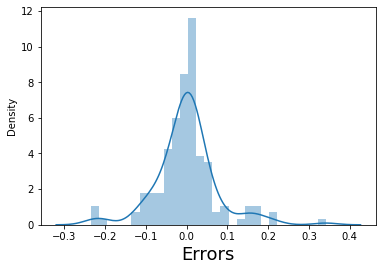

In [782]:
fig = plt.figure()
sns.distplot((y_train-y_train_price))
plt.xlabel('Errors',fontsize=18)
#the error terms seem to be approximately normally distributed, so the assumption on the linear modelling
#seems to be fulfilled (cumplida)

In [783]:
x_train_rfe

,curbweight,enginesize,horsepower,convertible,dohcv,ohcv,eight,four
122,0.272692,0.139623,0.083333,0,0,0,0,1
125,0.500388,0.339623,0.395833,0,0,0,0,1
166,0.314973,0.139623,0.266667,0,0,0,0,1
1,0.411171,0.260377,0.262500,1,0,0,0,1
199,0.647401,0.260377,0.475000,0,0,0,0,1
...,...,...,...,...,...,...,...,...
87,0.354926,0.184906,0.283333,0,0,0,0,1
103,0.609775,0.452830,0.433333,0,0,1,0,0
67,0.786268,0.460377,0.312500,0,0,0,0,0
24,0.185803,0.109434,0.083333,0,0,0,0,1


In [795]:
#with this variable we are going to do the prediction
X_train_new=linear_regression(y_train,x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.37e-56
Time:                        20:15:19   Log-Likelihood:                 164.85
No. Observations:                 143   AIC:                            -311.7
Df Residuals:                     134   BIC:                            -285.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0007      0.029      0.025      

In [785]:
y_test=data_test['price']
x_test=data_test.drop(['price'],axis=1)

In [786]:
x_test

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,std,...,rotor,eight,five,four,six,three,twelve,two,Budget,Medium
160,95.7,2094,98,3.19,70,166.3,64.4,0,1,1,...,0,0,0,1,0,0,0,0,1,0
186,97.3,2275,109,3.19,85,171.7,65.5,0,1,1,...,0,0,0,1,0,0,0,0,0,1
59,98.8,2385,122,3.39,84,177.8,66.5,0,1,1,...,0,0,0,1,0,0,0,0,0,1
165,94.5,2265,98,3.24,112,168.7,64.0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
140,93.3,2240,108,3.62,73,157.3,63.8,0,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,103.3,2535,122,3.34,88,174.6,64.6,0,1,1,...,0,0,0,1,0,0,0,0,1,0
29,95.9,2811,156,3.60,145,173.2,66.3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
182,97.3,2261,97,3.01,52,171.7,65.5,1,0,1,...,0,0,0,1,0,0,0,0,1,0
40,96.5,2372,110,3.15,86,175.4,62.5,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [787]:
#in this part we are going to use the model to make the predictions
X_train_new=X_train_new.drop('const',axis=1)

In [788]:
X_test_new=x_test[X_train_new.columns]

In [789]:
#adding the constant
#X_test_new=sm.add_constant(X_test_new)

In [797]:
y_pred=lm.predict(X_test_new)

In [798]:
from sklearn.metrics import r2_score 

In [799]:
r2_score(y_test,y_pred)

-2.345742124269862

In [800]:
y_pred

160     702.088083
186     766.523337
59      806.118904
165     765.311310
140     752.141546
          ...     
28      852.573692
29      968.940222
182     747.143571
40      796.637329
128    1002.088282
Length: 62, dtype: float64

Text(0, 0.5, 'y_pred')

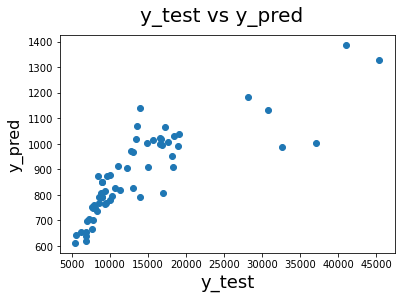

In [801]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   